## Code required to create intramodel subfigure of Figure 4
*From "Exploring uncertainty of trends in the lower-tropospheric North Pacific Jet."* 

Entire notebook takes ~n minutes to run on Intel i7-10750 using 32GB RAM  

Note: figure 4 is towards the end of the notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import matplotlib.lines as mlines
import seaborn as sns

In [2]:
multi_r_models_djf = pd.read_csv('outputs/multi_r_models_djf.csv')
multi_r_models_mam = pd.read_csv('outputs/multi_r_models_mam.csv')
multi_r_models_jja = pd.read_csv('outputs/multi_r_models_jja.csv')
multi_r_models_son = pd.read_csv('outputs/multi_r_models_son.csv')

In [3]:
multi_r_models_pval_djf = pd.read_csv('outputs/djf_hist_future_shift_pval.csv')
multi_r_models_pval_son = pd.read_csv('outputs/son_hist_future_shift_pval.csv')

In [4]:
df_diff_djf_ens_first = pd.read_csv('outputs/1st_realisation_djf.csv', index_col=0)
df_diff_son_ens_first = pd.read_csv('outputs/1st_realisation_son.csv', index_col=0)

In [5]:
df_diff_djf_ens_first = df_diff_djf_ens_first.rename(columns={'Grise & Polvani 2017': 'Grise & Polvani 2014'})
df_diff_djf_ens_first = df_diff_djf_ens_first[sorted(df_diff_djf_ens_first.columns, key=lambda col: col[-4:])]

In [6]:
df_diff_son_ens_first = df_diff_son_ens_first.rename(columns={'Grise & Polvani 2017': 'Grise & Polvani 2014'})
df_diff_son_ens_first = df_diff_son_ens_first[sorted(df_diff_son_ens_first.columns, key=lambda col: col[-4:])]


In [7]:
multi_r_models_djf.head()

,ACCESS-ESM1-5,CESM2-WACCM,CNRM-CM6-1,CNRM-ESM2-1,CanESM5,HadGEM3-GC31-LL,HadGEM3-GC31-MM,IPSL-CM6A-LR,MIROC-ES2L,UKESM1-0-LL
0,-0.602643,0.869725,1.995679,0.064595,2.634396,-0.020214,1.341278,0.265404,1.470211,-0.037256
1,-0.536366,0.914458,1.922337,0.092876,2.786439,-0.004519,1.336470,0.290777,1.354102,-0.037488
2,-0.667853,0.513141,1.389691,0.116126,2.759530,0.009259,1.641956,0.191074,1.786480,-0.111111
3,-0.633901,0.684482,1.747739,-0.272675,2.728611,-0.191545,0.990926,0.151297,1.307204,-0.377858
4,-0.708718,0.193365,1.245178,-0.230701,1.874469,-0.404885,0.829989,0.555034,1.197538,-0.320943


In [8]:
num_metrics = 6
model_counts = dict(multi_r_models_djf.count() / num_metrics)

In [9]:
model_counts

{'ACCESS-ESM1-5': 2.0,
 'CESM2-WACCM': 3.0,
 'CNRM-CM6-1': 6.0,
 'CNRM-ESM2-1': 2.0,
 'CanESM5': 19.0,
 'HadGEM3-GC31-LL': 4.0,
 'HadGEM3-GC31-MM': 4.0,
 'IPSL-CM6A-LR': 3.0,
 'MIROC-ES2L': 7.0,
 'UKESM1-0-LL': 6.0}

In [10]:
marker_list = ['o', 'X', 's', 'P',\
               'D',mmarkers.MarkerStyle((4, 1, 0)),\
               '^',mmarkers.MarkerStyle((4, 1, 45)), 'v', mmarkers.MarkerStyle((8, 1, 0))]

In [11]:
realisation_numbers = np.array(sorted(list(np.arange(1, 20))*num_metrics))
realisation_numbers

array([ 1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19])

In [12]:
legend_elements = [
    mlines.Line2D([0], [0], marker=marker_list[ind], color=f'C{ind}', label=multi_r_models_djf.columns[ind] + f" ({int(model_counts[multi_r_models_djf.columns[ind]])})",\
                  markersize=6, linestyle='None', alpha=.8) 
    for ind in range(len(multi_r_models_djf.columns))
]

In [13]:
df_diff_djf_ens_first.quantile(0.05)

Woollings et al. 2010   -0.137005
Barnes & Polvani 2013   -0.154188
Grise & Polvani 2014    -0.455652
Barnes & Simpson 2017   -0.336378
Zappa et al. 2018       -0.602377
Kerr et al. 2020        -0.548534
Name: 0.05, dtype: float64

In [14]:
df_diff_djf_ens_first

,Woollings et al. 2010,Barnes & Polvani 2013,Grise & Polvani 2014,Barnes & Simpson 2017,Zappa et al. 2018,Kerr et al. 2020
ACCESS-CM2,0.418530,0.410777,0.391282,0.260541,0.241211,-0.029816
ACCESS-ESM1-5,-0.602643,-0.536366,-0.633901,-0.667853,-0.708718,-0.572121
CESM2-WACCM,0.869725,0.914458,0.684482,0.513141,0.193365,0.069508
CMCC-CM2-SR5,2.421246,2.362236,2.240259,1.951196,1.258366,1.336146
CMCC-ESM2,1.066681,1.120054,1.054267,1.019244,0.663229,0.621949
CNRM-CM6-1,1.995679,1.922337,1.747739,1.389691,1.245178,0.923191
CNRM-ESM2-1,0.064595,0.092876,-0.272675,0.116126,-0.230701,-0.096677
CanESM5,2.408777,2.369870,2.217396,2.625193,1.763136,1.718586
EC-Earth3,2.003799,1.940024,1.800987,1.618012,1.373113,0.971775
EC-Earth3-CC,1.808228,1.725528,1.768452,2.296878,1.613416,1.183076


In [15]:
np.mean(df_diff_djf_ens_first.values) + np.std(df_diff_djf_ens_first.values)*2

2.7083884192255336

In [16]:
df_diff_djf_ens_first.max()

Woollings et al. 2010    2.874520
Barnes & Polvani 2013    2.878904
Grise & Polvani 2014     2.908811
Barnes & Simpson 2017    2.625193
Zappa et al. 2018        3.052320
Kerr et al. 2020         2.322970
dtype: float64

In [17]:
np.quantile(df_diff_djf_ens_first.values.flatten(), q=0.95)

2.375066144521113

In [18]:
q05_djf = np.quantile(df_diff_djf_ens_first.values.flatten(), q=0.05)
q10_djf = np.quantile(df_diff_djf_ens_first.values.flatten(), q=0.1)
q17_djf = np.quantile(df_diff_djf_ens_first.values.flatten(), q=0.17)
q83_djf = np.quantile(df_diff_djf_ens_first.values.flatten(), q=0.83)
q90_djf = np.quantile(df_diff_djf_ens_first.values.flatten(), q=0.9)


q05_son = np.quantile(df_diff_son_ens_first.values, q=0.05)
q10_son = np.quantile(df_diff_son_ens_first.values.flatten(), q=0.1)
q17_son = np.quantile(df_diff_son_ens_first.values.flatten(), q=0.17)
q83_son = np.quantile(df_diff_son_ens_first.values.flatten(), q=0.83)
q90_son = np.quantile(df_diff_son_ens_first.values.flatten(), q=0.9)
q95_son = np.quantile(df_diff_son_ens_first.values, q=0.95)

In [19]:
q10_djf, q17_djf, q83_djf, q90_djf

(-0.29415213872238294,
 -0.05603569569142029,
 1.7953289918703554,
 2.019769107495698)

In [20]:
q10_son, q17_son, q83_son, q90_son

(0.5153170940170959, 0.7206918616214969, 2.306376800108938, 2.5825933048432965)

In [21]:
djf_range = multi_r_models_djf.max() - multi_r_models_djf.min()
print(djf_range, djf_range.mean()) # 0.79 - 2.9

ACCESS-ESM1-5      1.317489
CESM2-WACCM        1.681809
CNRM-CM6-1         2.290443
CNRM-ESM2-1        0.793843
CanESM5            2.896183
HadGEM3-GC31-LL    1.342038
HadGEM3-GC31-MM    1.338893
IPSL-CM6A-LR       2.623698
MIROC-ES2L         2.647664
UKESM1-0-LL        2.325174
dtype: float64 1.9257234820734623


In [22]:
son_range = multi_r_models_son.max() - multi_r_models_son.min()
print(son_range, son_range.mean()) # 0.79 - 2.70, 1.70

ACCESS-ESM1-5      1.491986
CESM2-WACCM        1.621320
CNRM-CM6-1         1.552760
CNRM-ESM2-1        0.788846
CanESM5            2.210956
HadGEM3-GC31-LL    1.833596
HadGEM3-GC31-MM    1.288657
IPSL-CM6A-LR       1.038663
MIROC-ES2L         2.704795
UKESM1-0-LL        2.506590
dtype: float64 1.7038166177714316


In [23]:
SIG_PVAL = 0.05

In [24]:
sig_models_djf = multi_r_models_djf[multi_r_models_pval_djf < SIG_PVAL].count(axis=0) / multi_r_models_djf.count(axis=0)
sig_models_djf.mean() * 100

73.26545530492898

In [68]:
multi_r_models_djf.max() - multi_r_models_djf.min() 

ACCESS-ESM1-5      1.317489
CESM2-WACCM        1.681809
CNRM-CM6-1         2.290443
CNRM-ESM2-1        0.793843
CanESM5            2.896183
HadGEM3-GC31-LL    1.342038
HadGEM3-GC31-MM    1.338893
IPSL-CM6A-LR       2.623698
MIROC-ES2L         2.647664
UKESM1-0-LL        2.325174
dtype: float64

In [69]:
multi_r_models_son.max() - multi_r_models_son.min()  # 0.788846 - 2.704795

ACCESS-ESM1-5      1.491986
CESM2-WACCM        1.621320
CNRM-CM6-1         1.552760
CNRM-ESM2-1        0.788846
CanESM5            2.210956
HadGEM3-GC31-LL    1.833596
HadGEM3-GC31-MM    1.288657
IPSL-CM6A-LR       1.038663
MIROC-ES2L         2.704795
UKESM1-0-LL        2.506590
dtype: float64

In [62]:
djf_sig_df = pd.concat([multi_r_models_djf[multi_r_models_pval_djf < SIG_PVAL].count(), multi_r_models_djf[multi_r_models_pval_djf >= SIG_PVAL].count()], axis=1)
djf_sig_df.columns=['sig', 'nonsig']
djf_sig_df

,sig,nonsig
ACCESS-ESM1-5,7,5
CESM2-WACCM,15,3
CNRM-CM6-1,29,7
CNRM-ESM2-1,4,8
CanESM5,113,1
HadGEM3-GC31-LL,13,11
HadGEM3-GC31-MM,24,0
IPSL-CM6A-LR,14,4
MIROC-ES2L,38,4
UKESM1-0-LL,20,16


In [64]:
djf_sig_df.sum()

sig       277
nonsig     59
dtype: int64

In [63]:
son_sig_df = pd.concat([multi_r_models_son[multi_r_models_pval_son < SIG_PVAL].count(), multi_r_models_son[multi_r_models_pval_son >= SIG_PVAL].count()], axis=1)
son_sig_df.columns=['sig', 'nonsig']
son_sig_df

,sig,nonsig
ACCESS-ESM1-5,12,0
CESM2-WACCM,13,5
CNRM-CM6-1,36,0
CNRM-ESM2-1,12,0
CanESM5,114,0
HadGEM3-GC31-LL,24,0
HadGEM3-GC31-MM,23,1
IPSL-CM6A-LR,18,0
MIROC-ES2L,18,24
UKESM1-0-LL,34,2


In [65]:
son_sig_df.sum()

sig       304
nonsig     32
dtype: int64

/tmp/ipykernel_8076/1000774155.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(['']*18)
/tmp/ipykernel_8076/1000774155.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_yticklabels(['']*3)


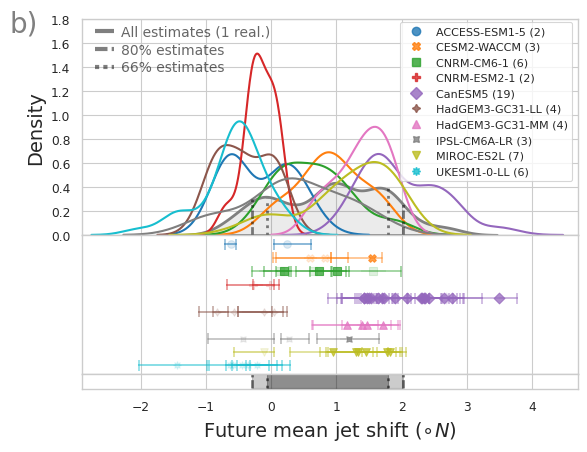

In [25]:
sns.set_context('paper')
sns.set_style('whitegrid')

fig, axes = plt.subplots(3, 1, sharey=False, sharex=True, height_ratios=[0.7, 0.45, 0.05]) 
plt.subplots_adjust(hspace=0)

for column in multi_r_models_djf.columns:
    sns.kdeplot(multi_r_models_djf[column], fill=False, linewidth=1.5, ax=axes[0])

y_offset = 0.0
# for ind, column in enumerate(multi_r_models_djf.columns):
for ind, (model, count) in enumerate(model_counts.items()):
    # if count < 1:
    for num in range(1, int(count)+1):
        sig_model_data = multi_r_models_djf[multi_r_models_pval_djf < SIG_PVAL].loc[realisation_numbers == num][model].dropna()
        nonsig_model_data = multi_r_models_djf[multi_r_models_pval_djf >= SIG_PVAL].loc[realisation_numbers == num][model].dropna()
        model_data = multi_r_models_djf.loc[realisation_numbers == num][model].dropna()
        if len(model_data) == 0:
            continue
        if len(model_data) == len(sig_model_data):
            axes[1].scatter(np.median(model_data.values), y=-y_offset, marker=marker_list[ind], color=f'C{ind}', label='Point Plot', s=30, alpha=.75)
        else:
            axes[1].scatter(np.median(model_data.values), y=-y_offset, marker=marker_list[ind], color=f'C{ind}', label='Point Plot', s=30, alpha=.15)

        axes[1].plot(model_data.values, np.zeros_like(model_data.values)-y_offset, color=f'C{ind}', linestyle='-', alpha=.5)
        cap_length = 0.2  # Adjust the length of the caps as needed
        axes[1].vlines(np.max(model_data.values), -y_offset - cap_length, -y_offset + cap_length, colors=f'C{ind}', alpha=.5)
        axes[1].vlines(np.min(model_data.values), -y_offset - cap_length, -y_offset + cap_length, colors=f'C{ind}', alpha=.5)
    # else:
    #     sns.scatterplot(x=multi_r_models_djf[model], y=np.zeros_like(multi_r_models_djf[model])-y_offset, alpha=0.75,\
    #                 marker=marker_list[ind], s=34, facecolor=f'C{ind}', edgecolor=f'C{ind}', label=f'{model}', ax=axes[1])
    y_offset += .5
sns.kdeplot(df_diff_djf_ens_first.mean(axis=1), ax=axes[0], color='k', edgecolor='grey',\
            fill=True, linewidth=2, alpha=.08, bw_adjust=.6)

    
axes[0].vlines(x=q10_djf, ymin=0, ymax=0.3, color='k', linestyle=(0, (3, 1, 1, 1)),linewidth=2, alpha=.5)
axes[0].vlines(x=q17_djf, ymin=0, ymax=0.31, color='k', linestyle='dotted',linewidth=2, alpha=.5)
axes[0].vlines(x=q83_djf, ymin=0, ymax=0.39, color='k', linestyle='dotted',linewidth=2, alpha=.5)
axes[0].vlines(x=q90_djf, ymin=0, ymax=0.26, color='k', linestyle=(0, (3, 1, 1, 1)),linewidth=2, alpha=.5)

axes[2].vlines(q10_djf, 0, 1, color='k', linestyle=(0, (3, 1, 1, 1)),linewidth=2, alpha=.5)
axes[2].vlines(q17_djf, 0, 1, color='k', linestyle='dotted',linewidth=2, alpha=.5)
axes[2].vlines(q83_djf, 0, 1, color='k', linestyle='dotted',linewidth=2, alpha=.5)
axes[2].vlines(q90_djf, 0, 1, color='k', linestyle=(0, (3, 1, 1, 1)),linewidth=2, alpha=.5)
axes[2].fill_between(x=[q17_djf, q83_djf], y1=0, y2=1, color='k', alpha=.3)
axes[2].fill_between(x=[q10_djf, q90_djf], y1=0, y2=1, color='k', alpha=.2)

axes[0].hlines(y=1.7, xmin=-2.7, xmax=-2.4, color='k', linewidth=3, alpha=.5)
axes[0].hlines(y=1.55, xmin=-2.7, xmax=-2.4, color='k', linestyle=(0, (3, 1, 1, 1)), linewidth=3, alpha=.5)
axes[0].hlines(y=1.4, xmin=-2.7, xmax=-2.4, color='k', linestyle=(0, (1, 1)), linewidth=3, alpha=.5)
axes[0].text(s="All estimates (1 real.)", x=-2.3, y=1.665, color='k', fontsize=10, alpha=.6)
axes[0].text(s="80% estimates", x=-2.3, y=1.51, color='k', fontsize=10, alpha=.6)
axes[0].text(s="66% estimates", x=-2.3, y=1.365, color='k', fontsize=10, alpha=.6)


axes[2].grid(axis='y')
axes[1].grid(axis='y')
axes[0].set_yticks(np.arange(0, 2, 0.2))
axes[1].set_yticklabels(['']*18)
axes[2].set_yticklabels(['']*3)
axes[2].set_xlabel("Future mean jet shift (${\circ N}$)", size=14)
axes[1].set_ylim(-4.8, 0.35)
axes[0].set_ylabel("Density", size=14)
axes[0].text(s="b)", x=-4, y=1.7, color='grey', size=20)
axes[0].set_ylim(0, 1.8)

for ax in axes:
    ax.set_xlim(-2.9, 4.7)

axes[1].legend(handles=legend_elements, ncols=1, bbox_to_anchor=(1.0, 1.35), loc=4, fontsize=8)

# fig.savefig(f'figures/figure_4_intramodel_djf.png', bbox_inches='tight', dpi=200)

In [26]:
sig_models_son = multi_r_models_son[multi_r_models_pval_son < SIG_PVAL].count(axis=0) / multi_r_models_son.count(axis=0)
sig_models_son.mean() * 100

90.53571428571429

/tmp/ipykernel_8076/3770928610.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(['']*18)
/tmp/ipykernel_8076/3770928610.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_yticklabels(['']*3)


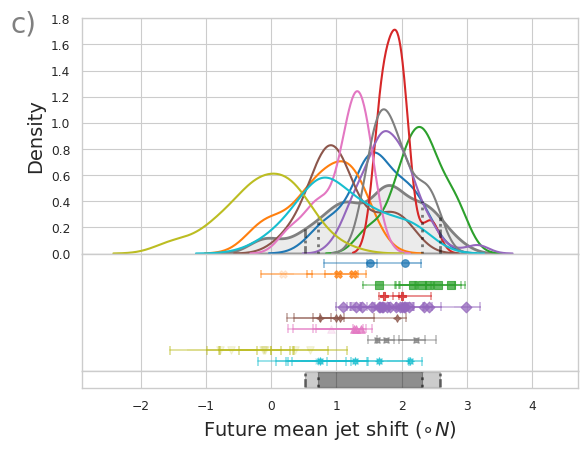

In [27]:
sns.set_context('paper')
sns.set_style('whitegrid')

fig, axes = plt.subplots(3, 1,  sharey=False, sharex=True, height_ratios=[0.7, 0.35, 0.05]) 
plt.subplots_adjust(hspace=0)

for column in multi_r_models_son.columns:
    sns.kdeplot(multi_r_models_son[column], linewidth=1.5, fill=False, ax=axes[0])

y_offset = 0.0
# for ind, column in enumerate(multi_r_models_djf.columns):
for ind, (model, count) in enumerate(model_counts.items()):
    # if count < 5:
    for num in range(1, int(count)+1):
        sig_model_data = multi_r_models_son[multi_r_models_pval_son < SIG_PVAL].loc[realisation_numbers == num][model].dropna()
        nonsig_model_data = multi_r_models_son[multi_r_models_pval_son >= SIG_PVAL].loc[realisation_numbers == num][model].dropna()
        model_data = multi_r_models_son.loc[realisation_numbers == num][model].dropna()
        if len(model_data) == 0:
            continue
        if len(model_data) == len(sig_model_data):
            axes[1].scatter(np.median(model_data.values), y=-y_offset, marker=marker_list[ind], color=f'C{ind}', label='Point Plot', s=30, alpha=.75)
        else:
            axes[1].scatter(np.median(model_data.values), y=-y_offset, marker=marker_list[ind], color=f'C{ind}', label='Point Plot', s=30, alpha=.15)
        axes[1].plot(model_data.values, np.zeros_like(model_data.values)-y_offset, color=f'C{ind}', linestyle='-', alpha=.5)
        cap_length = 0.2  # Adjust the length of the caps as needed
        axes[1].vlines(np.max(model_data.values), -y_offset - cap_length, -y_offset + cap_length, colors=f'C{ind}', alpha=.5)
        axes[1].vlines(np.min(model_data.values), -y_offset - cap_length, -y_offset + cap_length, colors=f'C{ind}', alpha=.5)
    # else:
    #     sns.scatterplot(x=multi_r_models_son[model], y=np.zeros_like(multi_r_models_son[model])-y_offset, alpha=0.75,\
    #                 marker=marker_list[ind], s=34, facecolor=f'C{ind}', edgecolor=f'C{ind}', ax=axes[1])
    y_offset += .5
sns.kdeplot(df_diff_son_ens_first.mean(axis=1), ax=axes[0], color='k', edgecolor='grey',\
            fill=True, linewidth=2, alpha=.08, bw_adjust=.6)

    
axes[0].vlines(x=q10_son, ymin=0, ymax=0.2, color='k', linestyle=(0, (3, 1, 1, 1)),linewidth=2, alpha=.5)
axes[0].vlines(x=q17_son, ymin=0, ymax=0.28, color='k', linestyle='dotted',linewidth=2, alpha=.5)
axes[0].vlines(x=q83_son, ymin=0, ymax=0.40, color='k', linestyle='dotted',linewidth=2, alpha=.5)
axes[0].vlines(x=q90_son, ymin=0, ymax=0.28, color='k', linestyle=(0, (3, 1, 1, 1)),linewidth=2, alpha=.5)

axes[2].vlines(q10_son, 0, 1, color='k', linestyle=(0, (3, 1, 1, 1)),linewidth=2, alpha=.5)
axes[2].vlines(q17_son, 0, 1, color='k', linestyle='dotted',linewidth=2, alpha=.5)
axes[2].vlines(q83_son, 0, 1, color='k', linestyle='dotted',linewidth=2, alpha=.5)
axes[2].vlines(q90_son, 0, 1, color='k', linestyle=(0, (3, 1, 1, 1)),linewidth=2, alpha=.5)
axes[2].fill_between(x=[q17_son, q83_son], y1=0, y2=1, color='k', alpha=.3)
axes[2].fill_between(x=[q10_son, q90_son], y1=0, y2=1, color='k', alpha=.2)

axes[2].grid(axis='y')
axes[1].grid(axis='y')
axes[1].set_yticklabels(['']*18)
axes[2].set_yticklabels(['']*3)
axes[2].set_xlabel("Future mean jet shift (${\circ N}$)", size=14)
axes[0].set_ylabel("Density", size=14)
axes[0].text(s="c)", x=-4, y=1.7, color='grey', size=20)
axes[0].set_ylim(0, 1.8)
for ax in axes:
    ax.set_xlim(-2.9, 4.7)
    

# Create a legend
# axes[1].legend(handles=legend_elements, ncols=1, bbox_to_anchor=(0.37, 3.), fontsize=8)

# fig.savefig(f'figures/figure_4_intramodel_son_no_legend.png', bbox_inches='tight', dpi=200)